In [1]:
from typing import Union

from collections import defaultdict
from itertools import combinations

import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage.transform import rescale
from skimage.measure import label, find_contours
from skimage.filters import gaussian
from scipy.spatial.distance import cdist
import scipy.stats as st
import os
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.draw import circle_perimeter
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

from ipywidgets import IntSlider, interact
from scipy.ndimage import convolve

def plot_img(img, cmap='gray'):
    plt.figure(figsize=(12,6))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

def get_gk(size=17, nsig=3):
    """Returns a 2D Gaussian kernel"""

    x = np.linspace(-nsig, nsig, size + 1)
    kernel_1d = np.diff(st.norm.cdf(x))
    
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    kernel_2d_norm = kernel_2d / kernel_2d.sum()
    
    return kernel_2d_norm


COLORS = ('blue', 'green', 'black', 'yellow', 'red')
TRAINS2SCORE = {1: 1, 2: 2, 3: 4, 4: 7, 6: 15, 8: 21}

In [2]:
def predict_image(img: np.ndarray) -> (Union[np.ndarray, list], dict, dict):
    # raise NotImplementedError
    city_centers = np.int64([[1000, 2000], [1500, 3000], [1204, 3251]])
    n_trains = {'blue': 20, 'green': 30, 'black': 0, 'yellow': 30, 'red': 0}
    scores = {'blue': 60, 'green': 90, 'black': 0, 'yellow': 45, 'red': 0}
    return city_centers, n_trains, scores

In [3]:
images = {}
HLS_img = {}
HSV_img = {}
folder = 'train'
for filename in os.listdir(folder):
    if ''.join(filename[-3:]) == 'jpg':
        images[filename] = cv2.imread(os.path.join(folder,filename))
        HLS_img[filename] = cv2.cvtColor(images[filename], cv2.COLOR_BGR2HLS)
        HSV_img[filename] = cv2.cvtColor(images[filename], cv2.COLOR_BGR2HSV)
        images[filename] = cv2.cvtColor(images[filename], cv2.COLOR_BGR2RGB)

In [4]:
img = images['all.jpg']
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
#img_gray = HLS_img['all.jpg'][:, :, 2]

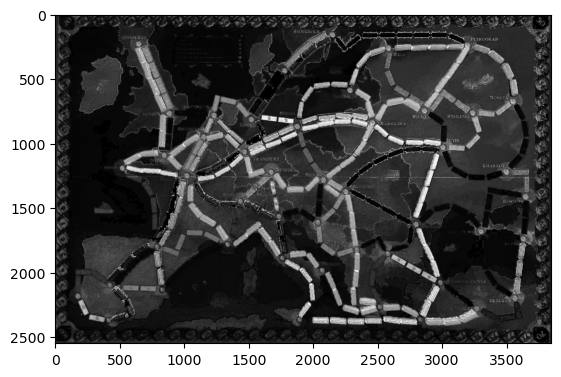

In [6]:
plt.imshow(HLS_img['all.jpg'][:, :, 2], cmap = 'gray')

In [7]:
sld1 = IntSlider(value=5, min=1, max=15, step=2, continuous_update=False)
sld2 = IntSlider(value=11, min=1, max=1001, step=2, continuous_update=False)
sld3 = IntSlider(value=15, min=1, max=20, step=1, continuous_update=False)


def vary_thresh_parameters(kernel_size, size, C, use_cv2=False):
    if use_cv2:
        blurred = cv2.GaussianBlur(img_gray, (kernel_size, kernel_size), 0)
        plot_img(cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, size, C))
    else:
        plot_img(cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, size, C))

9 25 8,

9 49 12,

9 17 5

In [8]:
#interact(vary_thresh_parameters, kernel_size=sld1, size=sld2, C=sld3, use_cv2=True);

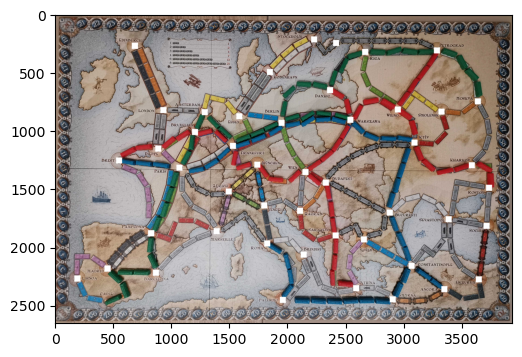

In [12]:
#img = images['all.jpg']
#img_gray = HLS_img['all.jpg'][:, :, 2]


blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
edges = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 4)
#plot_img(edges[2000:, :1000])


hough_radii = np.arange(26, 40, 1)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           min_xdistance=150, min_ydistance=150, total_num_peaks=47)
# Draw them
image3 = img.copy()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for center_y, center_x, radius in zip(cy, cx, radii):
    for i in range(center_x - radius, center_x + radius):
        for j in range(center_y - radius, center_y + radius):
            image3[j, i] = (255, 255, 255)

ax.imshow(image3)
plt.show()

In [10]:
accums[:7], cx[:7], cy[:7], radii[:7]

(array([1., 1., 1., 1., 1., 1., 1.]),
 array([2803, 2766, 1318, 1972,  895, 2170, 2581]),
 array([1624, 2022, 1953, 1961, 1978, 1993, 1999]),
 array([30, 30, 30, 30, 30, 30, 30]))

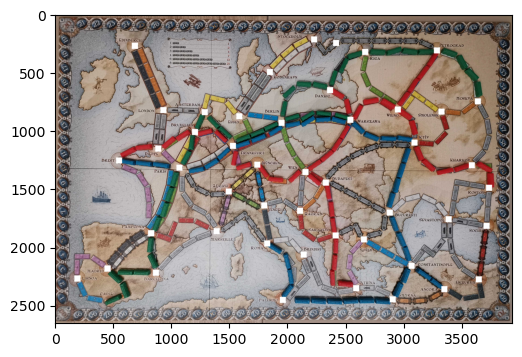

In [11]:
img = images['red_green_blue_inaccurate.jpg']
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
edges = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 7, 4)
#plot_img(edges[2000:, :1000])


hough_radii = np.arange(26, 28, 1)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           min_xdistance=150, min_ydistance=150, total_num_peaks=47)
# Draw them
image2 = img.copy()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for center_y, center_x, radius in zip(cy, cx, radii):
    for i in range(center_x - radius, center_x + radius):
        for j in range(center_y - radius, center_y + radius):
            image2[j, i] = (255, 255, 255)

ax.imshow(image2)
plt.show()

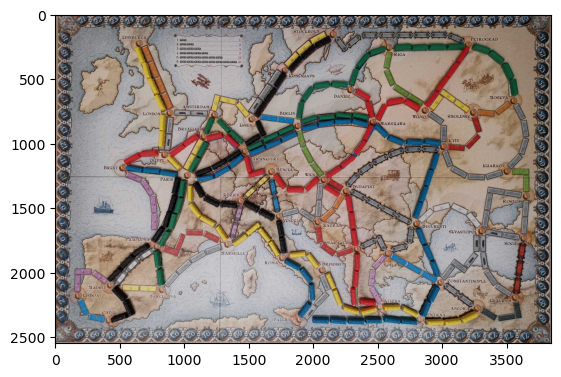

In [13]:
plt.imshow(images['all.jpg'])

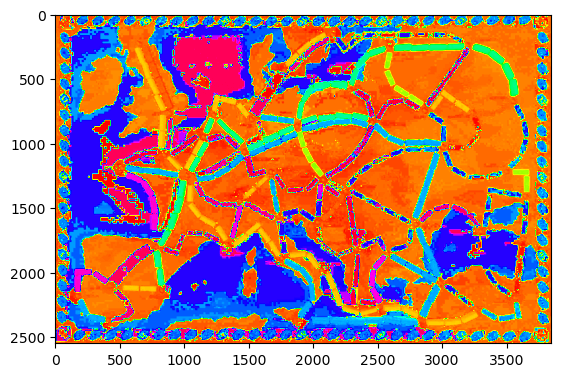

In [14]:
plt.imshow(HLS_img['all.jpg'][:, :, 0], cmap='hsv')

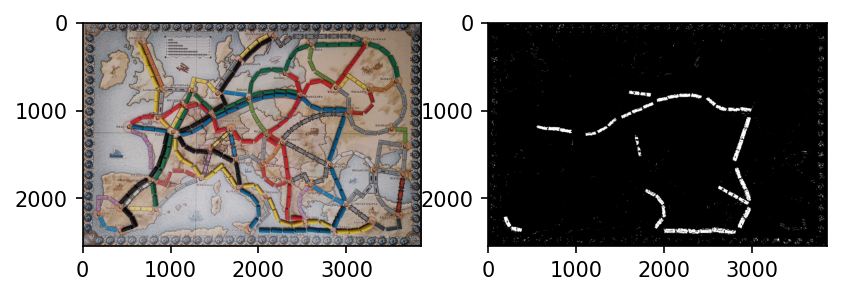

In [15]:
mask_blue_all = (HLS_img['all.jpg'][:, :, 0] > 97) & (HLS_img['all.jpg'][:, :, 0] < 103)
plt.figure(dpi=150)
plt.subplot(1,2,1)   
# plt.axis('off')
plt.imshow(images['all.jpg'])

plt.subplot(1,2,2)
plt.imshow(mask_blue_all, cmap="gray")
# plt.axis('off')
#plt.imshow(mask_blue_all[600:1500, 1500:2500], cmap="gray")

# Blue

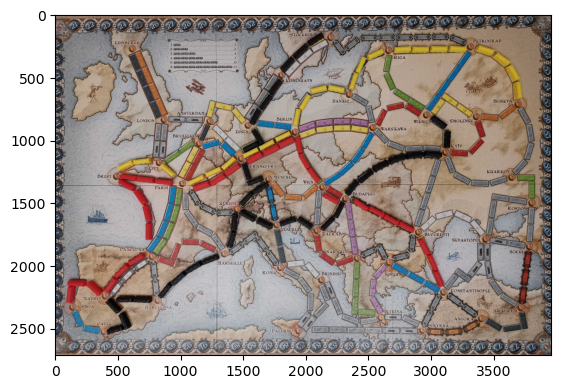

In [16]:
plt.imshow(images['black_red_yellow.jpg'])

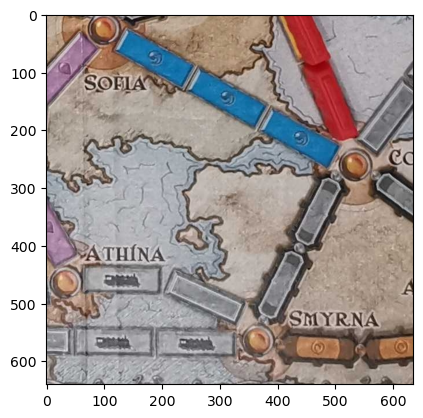

In [137]:
plt.imshow(images['black_red_yellow.jpg'][1953:2593, 2567:3202])

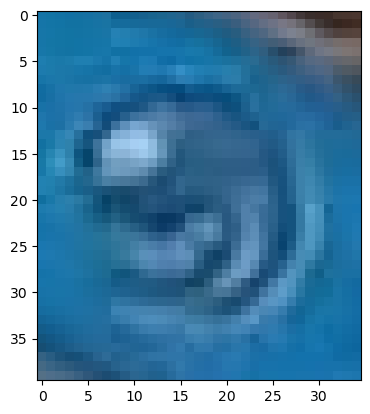

In [161]:
plt.imshow(images['black_red_yellow.jpg'][2147:2187, 2992:3027])

In [162]:
template_blue1 = images['black_red_yellow.jpg'][2490:2530, 278:313]
template_blue2 = images['black_red_yellow.jpg'][2400:2440, 165:200]
template_blue3 = images['black_red_yellow.jpg'][1415:1455, 920:955]
template_blue4 = images['black_red_yellow.jpg'][1105:1145, 2405:2440]
template_blue5 = images['black_red_yellow.jpg'][855:895, 1665:1700]
template_blue6 = images['black_red_yellow.jpg'][1020:1060, 1230:1265]
template_blue7 = images['black_red_yellow.jpg'][2075:2115, 2865:2900]
template_blue8 = images['black_red_yellow.jpg'][455:495, 3170:3205]
template_blue9 = images['black_red_yellow.jpg'][1420:1460, 1702:1737]
template_blue10 = images['black_red_yellow.jpg'][1555:1595, 890:925]
template_blue11 = images['black_red_yellow.jpg'][1685:1725, 843:878]
template_blue12 = images['black_red_yellow.jpg'][1812:1852, 775:810]
template_blue13 = images['black_red_yellow.jpg'][875:915, 1803:1838]
template_blue14 = images['black_red_yellow.jpg'][985:1025, 2482:2517]
template_blue15 = images['black_red_yellow.jpg'][1210:1250, 2307:2342]
template_blue16 = images['black_red_yellow.jpg'][1295:1335, 2197:2232]
template_blue17 = images['black_red_yellow.jpg'][1053:1093, 1367:1402]
template_blue18 = images['black_red_yellow.jpg'][2008:2048, 2738:2773]
template_blue19 = images['black_red_yellow.jpg'][2147:2187, 2992:3027]
templates_blue = [template_blue1, template_blue2, template_blue3, template_blue4, 
                  template_blue5, template_blue6, template_blue7, template_blue8, 
                  template_blue9, template_blue10, template_blue11, template_blue12, 
                  template_blue13, template_blue14, template_blue15, template_blue16,
                 template_blue17, template_blue18, template_blue19]

In [468]:
def countNonTrains(img_gray, templates, threshold):
    coordinates = []
    for template in templates:
        template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
        res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= threshold)
        
        for i in range(len(loc[0])):
            flag = True
            for j in range(len(coordinates)):
                if abs(coordinates[j][0] - loc[0][i]) <= 80 and abs(coordinates[j][1] - loc[1][i]) <= 80:
                    flag = False
            if flag:
                coordinates.append((loc[0][i], loc[1][i]))
    return coordinates
        

In [191]:
coord = countNonTrains(cv2.cvtColor(images['black_red_yellow.jpg'], cv2.COLOR_RGB2GRAY), templates_blue, 0.7)

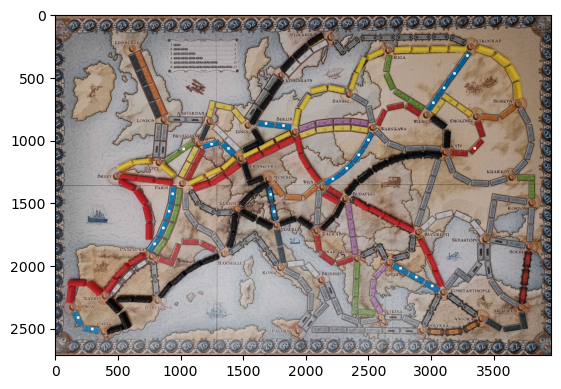

In [192]:
image_temp = images['black_red_yellow.jpg'].copy()
radius = 10
for i in range(len(coord)):
    for x in range(coord[i][0] - radius + 17, coord[i][0] + radius + 17):
        for y in range(coord[i][1] - radius + 20, coord[i][1] + radius + 20):
            image_temp[x, y] = (255, 255, 255)
plt.imshow(image_temp)

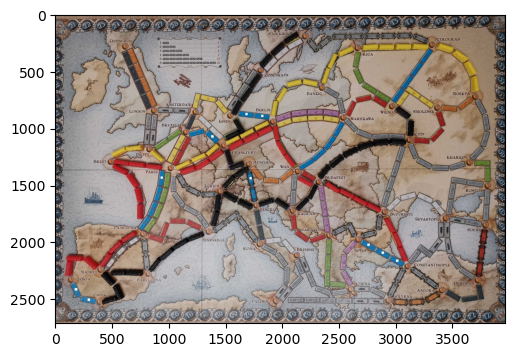

In [181]:
hello = images['black_red_yellow.jpg']

img_gray1 = cv2.cvtColor(hello, cv2.COLOR_RGB2GRAY)
w, h = 10, 10
res = cv2.matchTemplate(img_gray1,cv2.cvtColor(template_blue2, cv2.COLOR_RGB2GRAY),cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where(res >= threshold)
radius = 10
image_temp = hello.copy()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for i in range(len(loc[0])):
    for x in range(loc[0][i] - radius + 17, loc[0][i] + radius + 17):
        for y in range(loc[1][i] - radius + 20, loc[1][i] + radius + 20):
            image_temp[x, y] = (255, 255, 255)

ax.imshow(image_temp)
plt.show()

In [96]:
loc

(array([1880, 1946, 1946, 1946, 1947, 1947, 2013, 2244, 2244, 2244, 2245,
        2245, 2245, 2245, 2246, 2246, 2246]),
 array([2647, 2764, 2765, 2766, 2764, 2765, 2884,  201,  202,  203,  200,
         201,  202,  203,  200,  201,  202]))

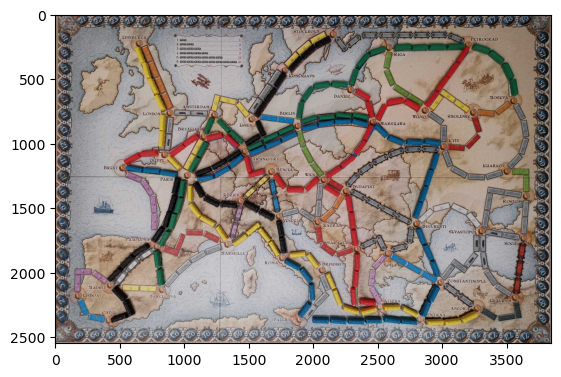

In [196]:
plt.imshow(images['all.jpg'])

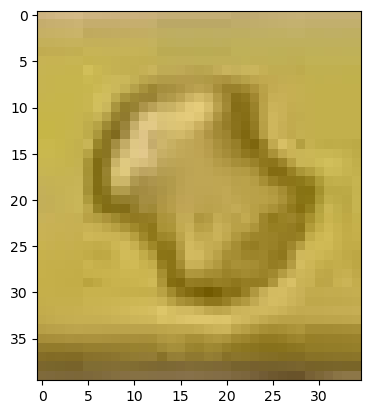

In [251]:
plt.imshow(images['black_red_yellow.jpg'][890:930,2275:2310])

In [252]:
template_yellow1 = images['black_blue_green.jpg'][255:295, 1940:1975]
template_yellow2 = images['black_blue_green.jpg'][635:675, 3085:3120]
template_yellow3 = images['black_blue_green.jpg'][1862:1902, 2932:2967]
template_yellow4 = images['black_blue_green.jpg'][1403:1443, 1523:1558]
template_yellow5 = images['black_blue_green.jpg'][750:790, 1462:1497]
template_yellow6 = images['black_blue_green.jpg'][1048:1088, 1106:1141]
template_yellow7 = images['black_blue_green.jpg'][2159:2199, 595:630]
template_yellow8 = images['black_red_yellow.jpg'][898:938,2137:2172]
template_yellow9 = images['red_green_blue_inaccurate.jpg'][1070:1110,1135:1170]
template_yellow10 = images['black_blue_green.jpg'][712:752, 3196:3231]
template_yellow11 = images['all.jpg'][668:708,1230:1265]
template_yellow12 = images['all.jpg'][723:763,1440:1475]
template_yellow13 = images['all.jpg'][665:705,2942:2977]
template_yellow14 = images['all.jpg'][332:372,1820:1855]
template_yellow15 = images['black_red_yellow.jpg'][890:930,2275:2310]

templates_yellow = [template_yellow1, template_yellow2, template_yellow3, template_yellow4,
                   template_yellow5, template_yellow6, template_yellow7, template_yellow8,
                   template_yellow9, template_yellow10, template_yellow11, template_yellow12,
                   template_yellow13, template_yellow14, template_yellow15]

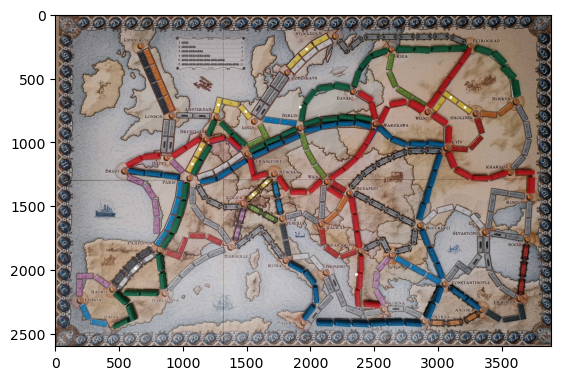

In [262]:
img = images['red_green_blue.jpg']

coord = countNonTrains(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), templates_yellow, 0.9)

image_temp = img.copy()
radius = 10
for i in range(len(coord)):
    for x in range(coord[i][0] - radius + 17, coord[i][0] + radius + 17):
        for y in range(coord[i][1] - radius + 20, coord[i][1] + radius + 20):
            image_temp[x, y] = (255, 255, 255)
plt.imshow(image_temp)

In [326]:
mask_yellow_all = ((HSV_img['all.jpg'][:, :, 0] > 21) & (HSV_img['all.jpg'][:, :, 0] < 27)).astype('uint8')

In [317]:
template_yellow = ((template_yellow1.astype(int)+template_yellow2.astype(int)+template_yellow4.astype(int)+template_yellow7.astype(int)+template_yellow9) // 5).astype('uint8')

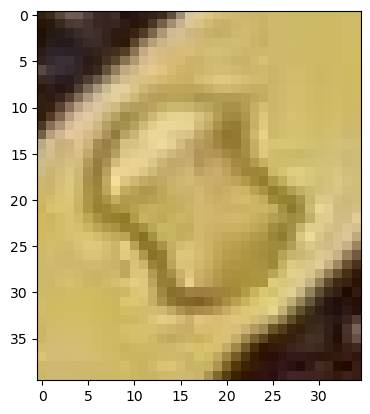

In [318]:
plt.imshow(template_yellow4)

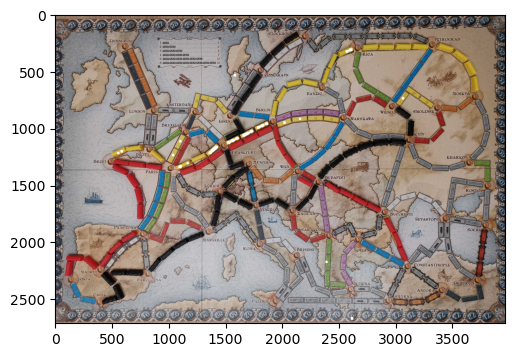

In [334]:
name = 'black_red_yellow.jpg'
hello = images[name]
mask = cv2.dilate(((HLS_img[name][:, :, 0] > 21) & (HLS_img[name][:, :, 0] < 27)).astype('uint8'),kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15)),iterations = 1)

img_gray1 = cv2.cvtColor(hello, cv2.COLOR_RGB2GRAY) * mask
w, h = 10, 10
res = cv2.matchTemplate(img_gray1,cv2.cvtColor(template_yellow, cv2.COLOR_RGB2GRAY),cv2.TM_CCOEFF_NORMED)
threshold = 0.6
loc = np.where(res >= threshold)
radius = 10
image_temp = hello.copy()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
for i in range(len(loc[0])):
    for x in range(loc[0][i] - radius + 17, loc[0][i] + radius + 17):
        for y in range(loc[1][i] - radius + 20, loc[1][i] + radius + 20):
            image_temp[x, y] = (255, 255, 255)

ax.imshow(image_temp)
plt.show()

# Green

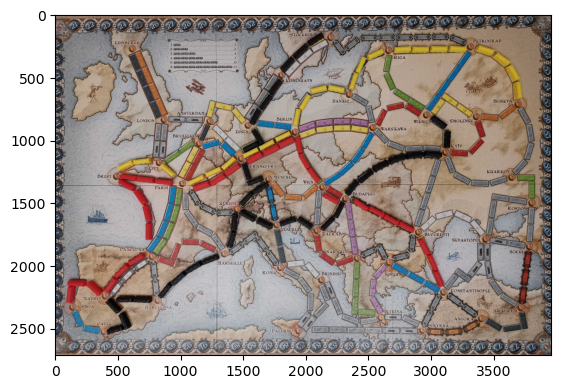

In [483]:
plt.imshow(images['black_red_yellow.jpg'])

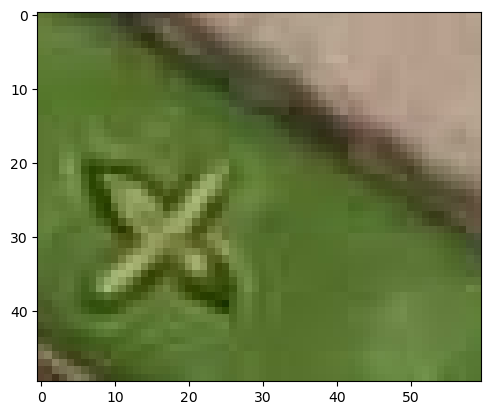

In [490]:
plt.imshow(images['black_red_yellow.jpg'][690:740, 2870:2930])

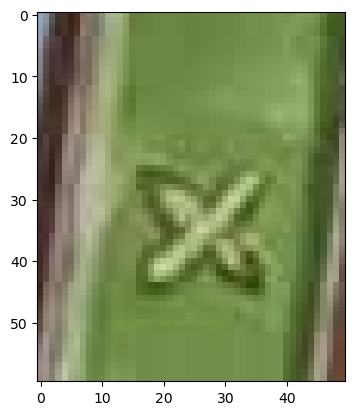

In [433]:
plt.imshow(images['black_red_yellow.jpg'][1420:1480, 960:1010])

In [502]:
template_green1 = images['all.jpg'][320:380, 2540:2610]
template_green2 = images['all.jpg'][470:540, 2580:2640]
template_green3 = images['all.jpg'][570:620, 2640:2740]
template_green4 = images['all.jpg'][1190:1255, 3590:3640]
template_green5 = images['all.jpg'][1295:1340, 3620:3690]
template_green6 = images['black_blue_green.jpg'][970:1030, 1500:1580]
template_green7 = images['black_blue_green.jpg'][880:970, 1600:1670]
template_green8 = images['black_blue_green.jpg'][980:1060, 1920:1970]
template_green9 = images['black_blue_green.jpg'][1100:1160, 1970:2030]
template_green10 = images['black_blue_green.jpg'][1200:1270, 2040:2110]
template_green11 = images['black_red_yellow.jpg'][1110:1170, 910:970]
template_green12 = images['black_red_yellow.jpg'][1030:1080, 1020:1080]
template_green13 = images['black_red_yellow.jpg'][2010:2080, 2370:2450]
template_green14 = images['black_red_yellow.jpg'][2160:2220, 2370:2440]
template_green15 = images['black_red_yellow.jpg'][2300:2360, 2370:2440]
template_green16 = images['black_red_yellow.jpg'][2340:2400, 2470:2520]
template_green17 = images['black_red_yellow.jpg'][1830:1880, 820:880]
template_green18 = images['black_red_yellow.jpg'][1700:1760, 890:950]
template_green19 = images['black_red_yellow.jpg'][1560:1620, 940:1000]
template_green20 = images['black_red_yellow.jpg'][1420:1480, 960:1010]
template_green21 = images['red_green_blue_inaccurate.jpg'][1530:1600, 1560:1620]
template_green22 = images['red_green_blue_inaccurate.jpg'][1590:1660, 1680:1730]
template_green23 = images['black_red_yellow.jpg'][690:740, 2870:2930]

templates_green = [template_green1, template_green2, template_green3,template_green4, template_green5, 
                    template_green6, template_green7, template_green8, template_green9, template_green10, 
                    template_green11, template_green12, template_green13, template_green14, template_green15, template_green16, 
                   template_green17, template_green18, template_green19, template_green20, template_green21, template_green22,
                  template_green23]


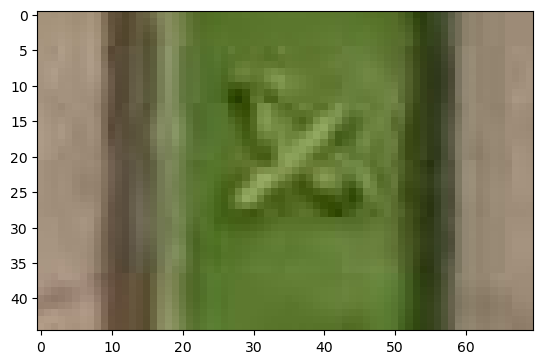

In [503]:
plt.imshow(images['all.jpg'][1295:1340, 3620:3690])

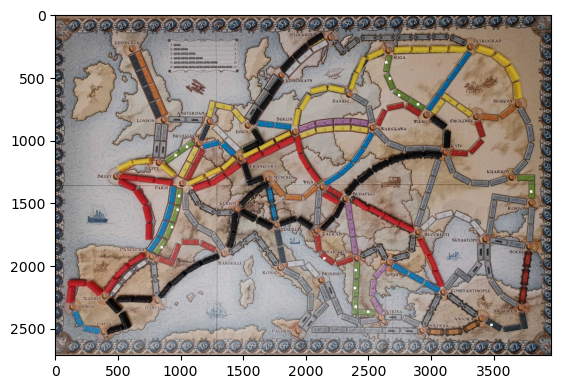

In [506]:
img = images['black_red_yellow.jpg']

coord = countNonTrains(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), templates_green, 0.83)

image_temp = img.copy()
radius = 10
for i in range(len(coord)):
    for x in range(coord[i][0] - radius + 30, coord[i][0] + radius + 30):
        for y in range(coord[i][1] - radius + 30, coord[i][1] + radius + 30):
            image_temp[x, y] = (255, 255, 255)
plt.imshow(image_temp)